# HMEQ LOAN DEFAULT PREDICTION

## *_STATISTICAL AND VISUALIZATION LIBRARIES_*

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

#### **Import, visualize, and basic infomation of Loan data set**

In [2]:
df = pd.read_csv("hmeq_Loan_Default.csv").copy()
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.shape

(5960, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

* 1/5 of DEBTINC data is made up of null values (how was this data gotten), there is need make sense of the data in each column.
* YOJ in wrong data type should be int
* CLAGE in wring data type should be int

#### **Descriptive statistics of data set**

In [ ]:
# Split data set to Categorical and Numerical dtypes
df_cat= df.select_dtypes(object)
df_cat.describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [7]:
df_num= df.select_dtypes([int, float])
df_num.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## *_Exploratory Data Analysis of Loan Data set_*

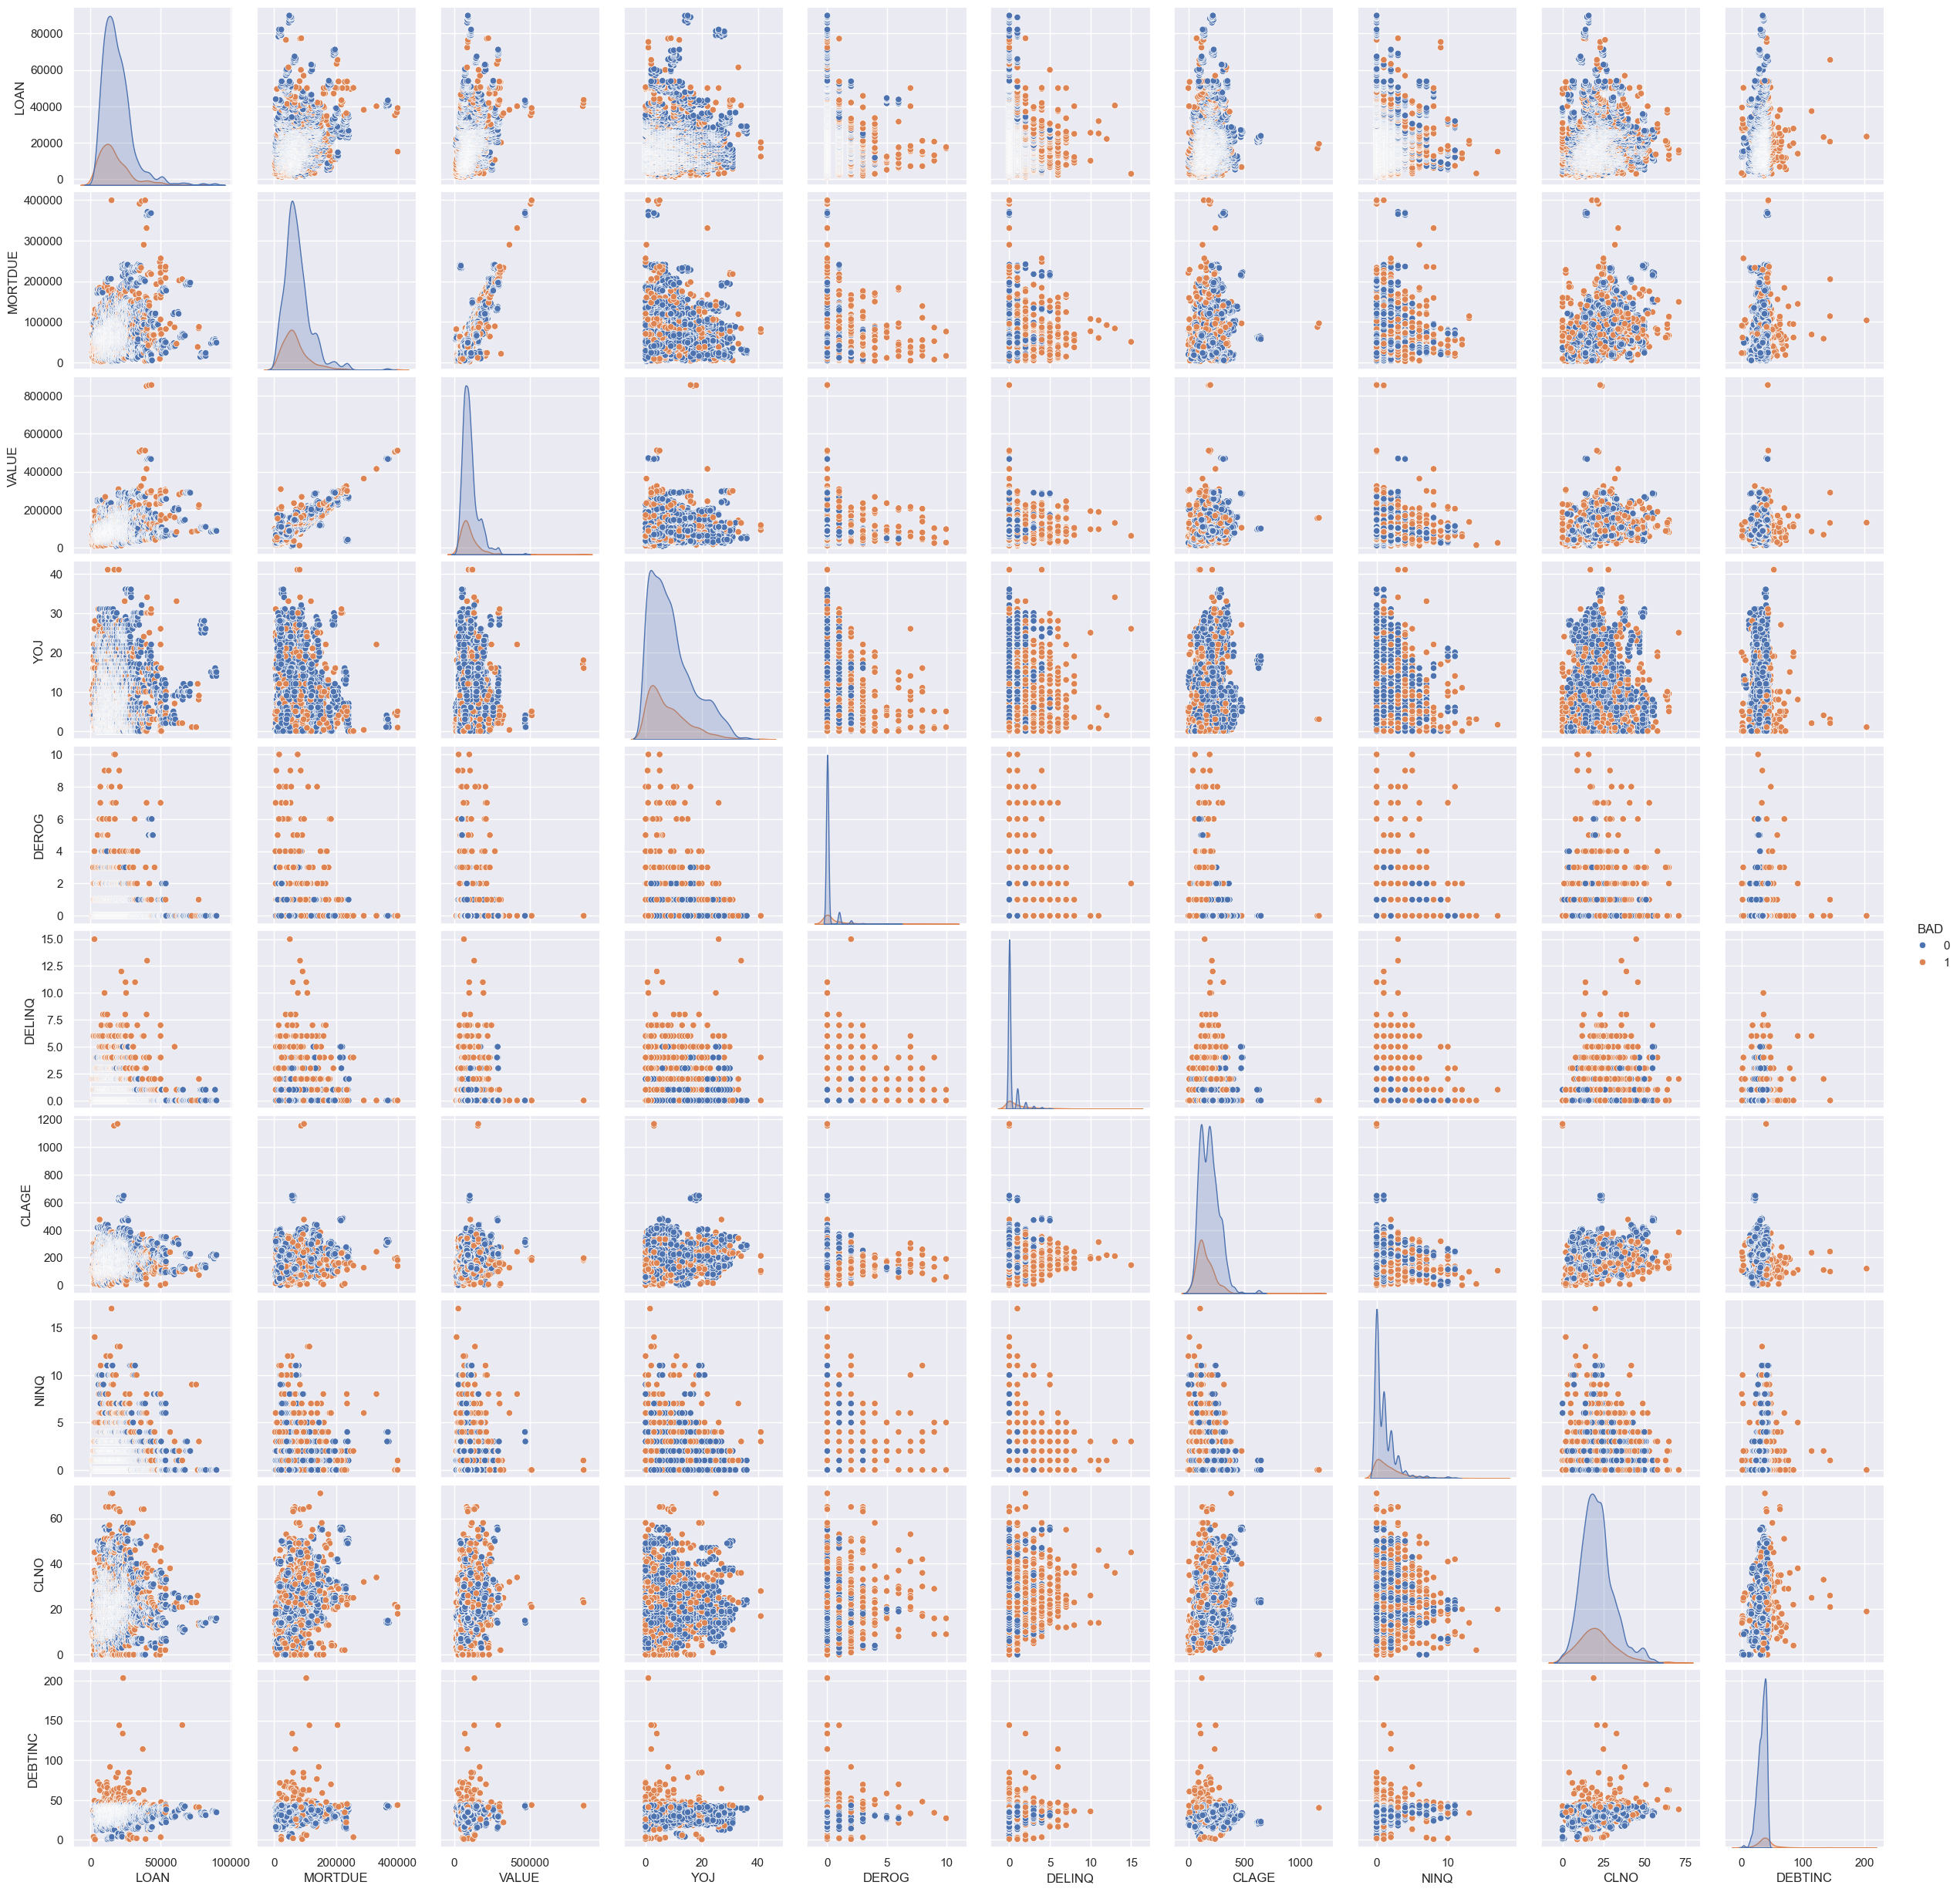

In [8]:
# gplot = sns.PairGrid(df)
# gplot.map(sns.scatterplot)

pairplot= sns.pairplot(df, hue="BAD")

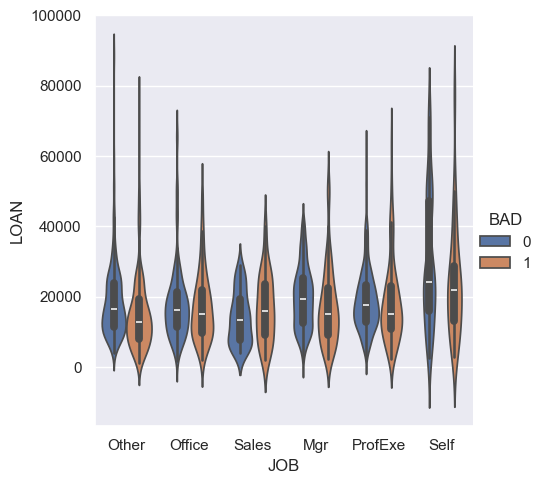

In [9]:
job_loan= sns.catplot(df, x="JOB", y="LOAN", kind="violin", hue="BAD")
# job_loan_fig = job_loan.get_figure()
job_loan.savefig("./plots/job_loan.png")

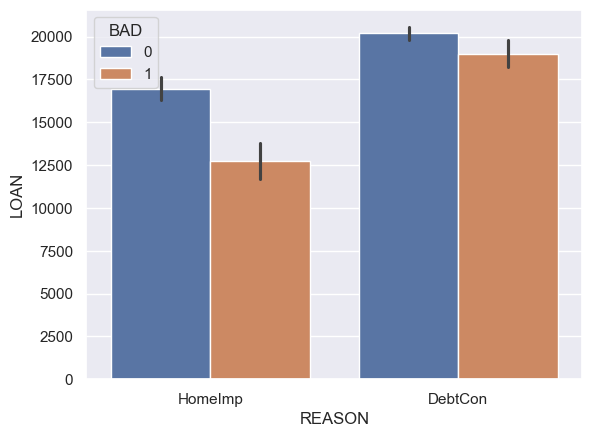

In [17]:
bad_loan= sns.barplot(df, x="REASON", y="LOAN", hue="BAD", legend=True)
bad_loan_fig = bad_loan.get_figure()
bad_loan_fig.savefig("./plots/bad_loan.png")

In [35]:
# split data by BAD column
default= df[df.BAD == 1]
non_default= df[df.BAD == 0]

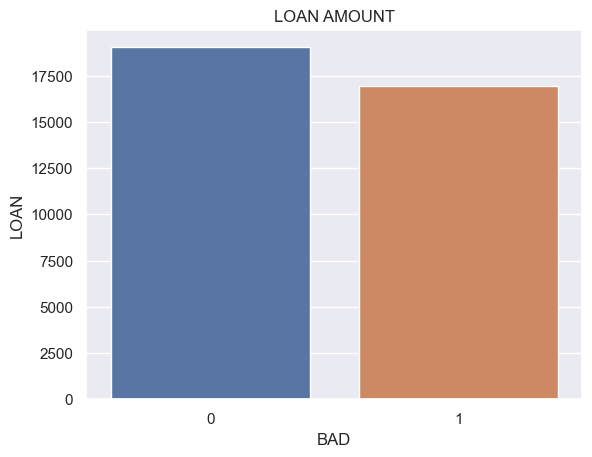

In [75]:
loan_amount= sns.barplot(df, y="LOAN", x="BAD", hue="BAD", errorbar=None, legend=False)
plt.title("LOAN AMOUNT")
loan_fig = loan_amount.get_figure()
loan_fig.savefig("./plots/loan_amount.png")

<Axes: xlabel='CLAGE', ylabel='YOJ'>

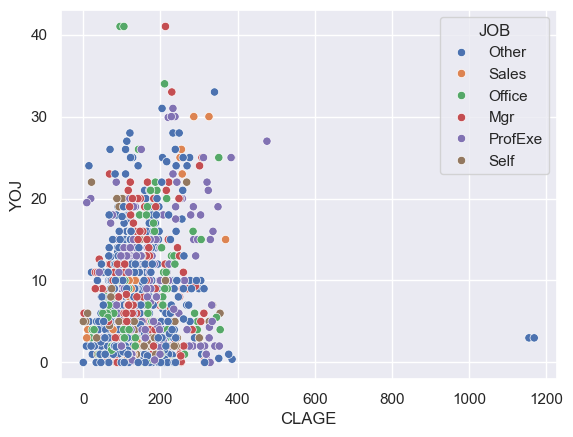

In [116]:
# sns.scatterplot(default, x="CLAGE", y="YOJ", hue="JOB")

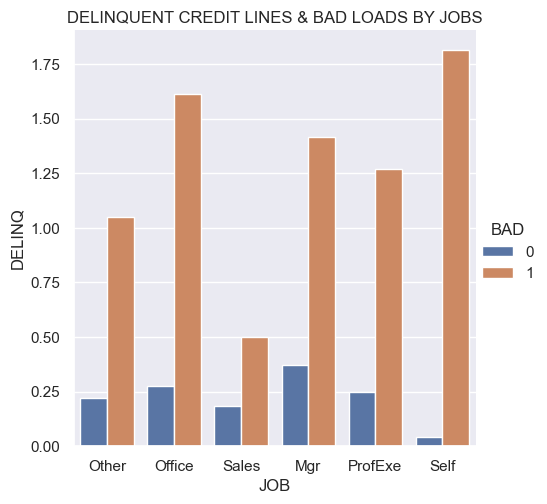

In [56]:
job_delinq= sns.catplot(df, x="JOB", y="DELINQ", kind="bar", hue="BAD", errorbar=None)
# job_delinq_fig = job_loan.get_figure()
plt.title("DELINQUENT CREDIT LINES & BAD LOADS BY JOBS")
job_delinq.savefig("./plots/job_delinq.png")

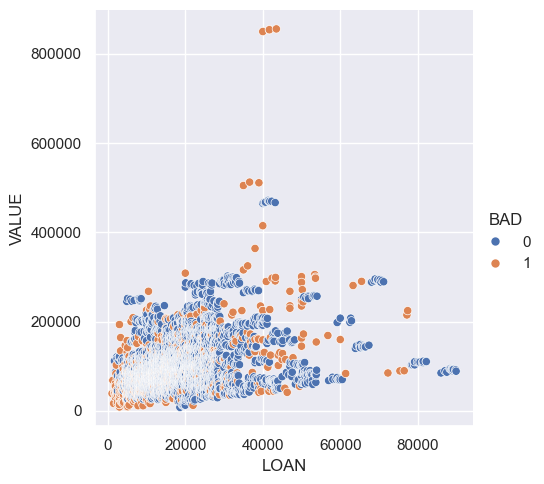

In [89]:
pos_cor_loan_value= sns.relplot(df, x="LOAN", y="VALUE", hue="BAD")
# pos_cor_loan_value_fig = pos_cor_loan_value.get_figure()
pos_cor_loan_value.savefig("./plots/relation_loan_value.png")

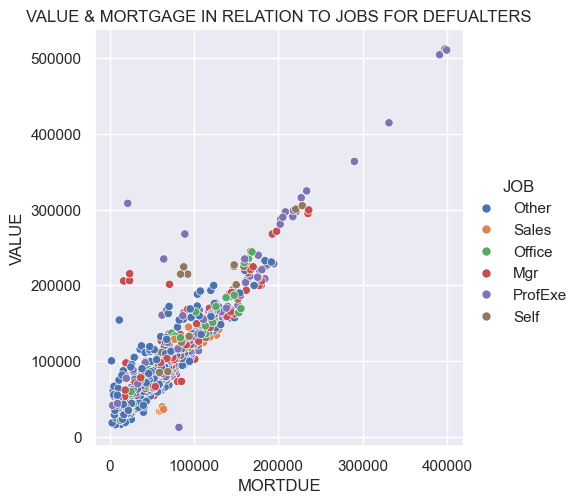

In [59]:
rel_value_mortdue = sns.relplot(default, x="MORTDUE", y="VALUE", hue="JOB")
plt.title("VALUE & MORTGAGE IN RELATION TO JOBS FOR DEFUALTERS")
rel_value_mortdue.savefig("./plots/rel_value_mortdue_def.png")

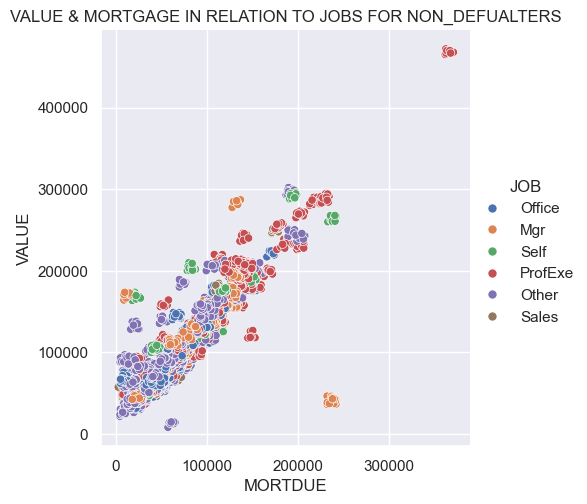

In [61]:
rel_value_mortdue = sns.relplot(non_default, x="MORTDUE", y="VALUE", hue="JOB")
plt.title("VALUE & MORTGAGE IN RELATION TO JOBS FOR NON_DEFUALTERS")
rel_value_mortdue.savefig("./plots/rel_value_mortdue_nondef.png")

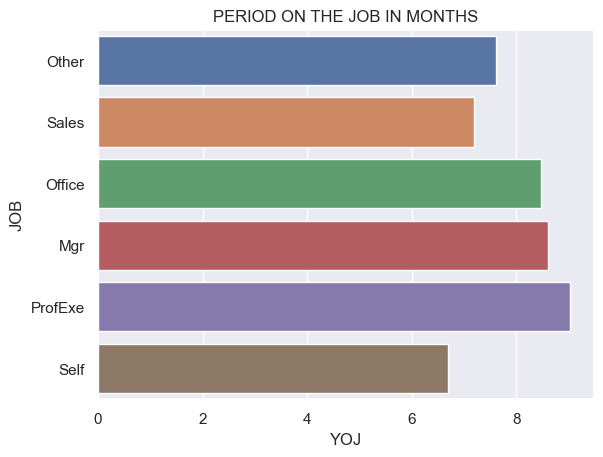

In [82]:
job_exp= sns.barplot(default, y="JOB", x="YOJ", hue="JOB", legend=False, errorbar=None)
plt.title("PERIOD ON THE JOB IN MONTHS")
job_exp_fig = job_exp.get_figure()
job_exp_fig.savefig("./plots/job_exp")

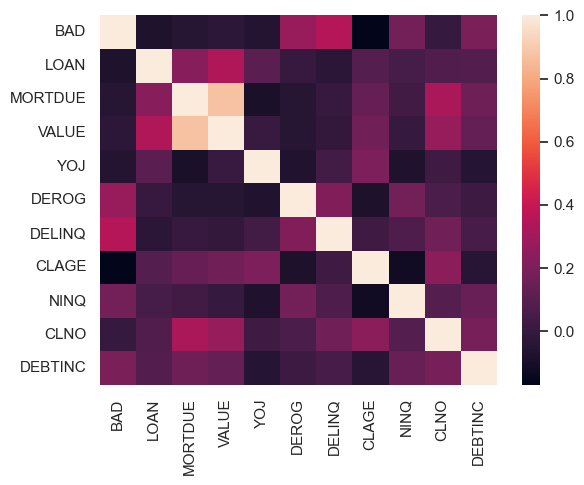

In [94]:
df_num_corr= df_num.corr()
corr_num= sns.heatmap(df_num_corr)
corr_num_fig = corr_num.get_figure()
corr_num_fig.savefig("./plots/corr_num.png")

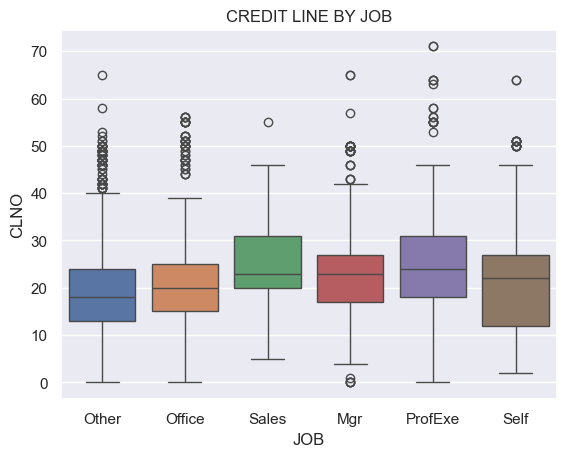

In [109]:
clno_job= sns.boxplot(df, x="JOB", y="CLNO", hue="JOB", legend=False)
clno_job_fig = clno_job.get_figure()
plt.title("CREDIT LINE BY JOB")
clno_job_fig.savefig("./plots/clno_job.png")

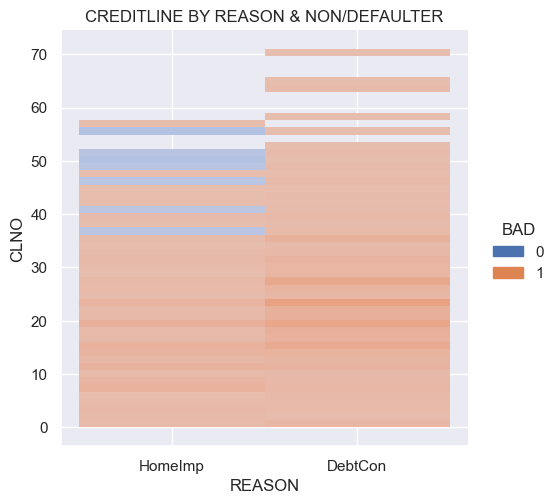

In [111]:
clno_rsn_bad= sns.displot(df, x="REASON", y="CLNO", hue="BAD")
plt.title("CREDITLINE BY REASON & NON/DEFAULTER")
# clno_rsn_bad_fig = clno_rsn_bad.get_figure()
clno_rsn_bad.savefig("./plots/clno_rsn_bad.png")

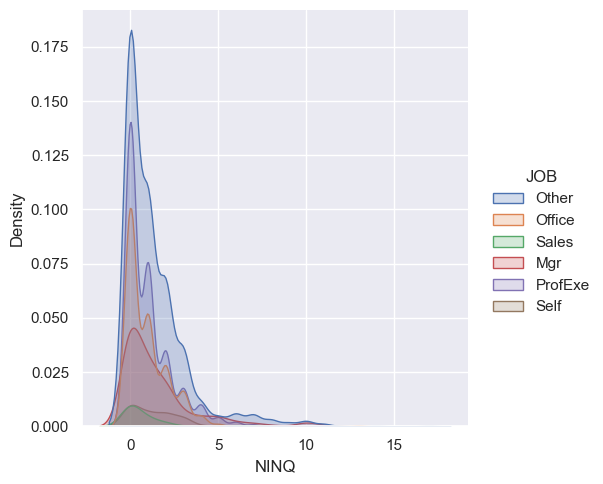

In [115]:
sns.displot(df, x="NINQ", hue="JOB", kind="kde", fill="True")


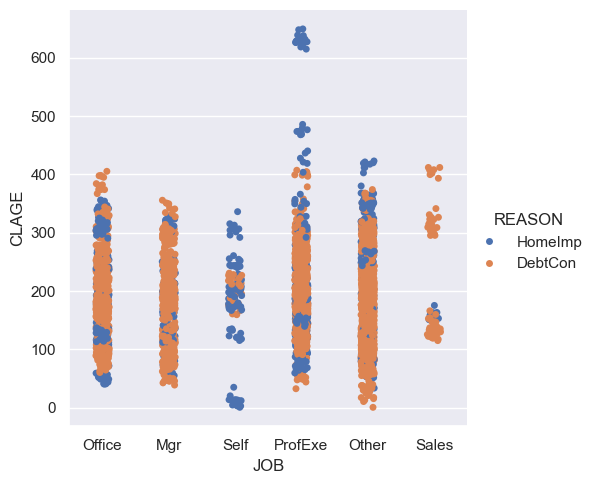

In [ ]:
sns.catplot(non_default, x="JOB", y="CLAGE", hue="REASON")

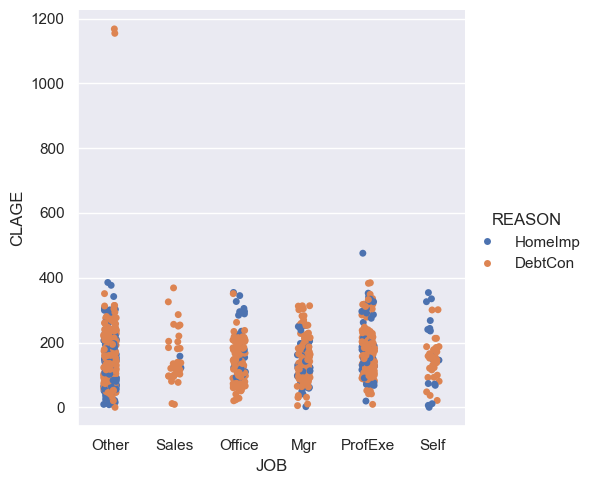

In [107]:

sns.catplot(default, x="JOB", y="CLAGE", hue="REASON")

## *_FIX ISSUES WITH DATA SET_*

In [ ]:
# correct datatypes
# input missing values

## *_SPLIT DATA SET INTO X (FEATURES) AND Y (LABEL)_*

In [117]:
x= df.drop(columns=["BAD"])
y= df.BAD

In [118]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

In [119]:
x.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [45]:
from sklearn.impute import SimpleImputer

# Define strategies for imputing missing values
# Numerical columns: Mean imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns: Most frequent value imputation
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify that all missing values have been handled
missing_values_post_imputation = df.isnull().sum()
missing_values_post_imputation

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [47]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300.0,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500.0,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500.0,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700.0,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900.0,57264.0000,90185.000000,DebtCon,Other,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000.0,54576.0000,92937.000000,DebtCon,Other,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200.0,54045.0000,92924.000000,DebtCon,Other,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800.0,50370.0000,91861.000000,DebtCon,Other,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19640\2374956644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BAD', data=df, palette='pastel')


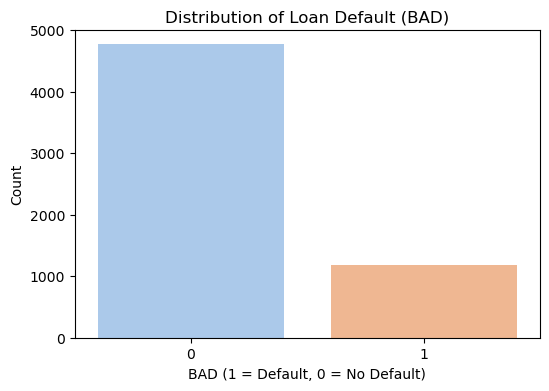

ValueError: could not convert string to float: 'Other'

<Figure size 1200x1000 with 0 Axes>

In [53]:
import seaborn as sns


# Plot target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='BAD', data=df, palette='pastel')
plt.title("Distribution of Loan Default (BAD)")
plt.xlabel("BAD (1 = Default, 0 = No Default)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


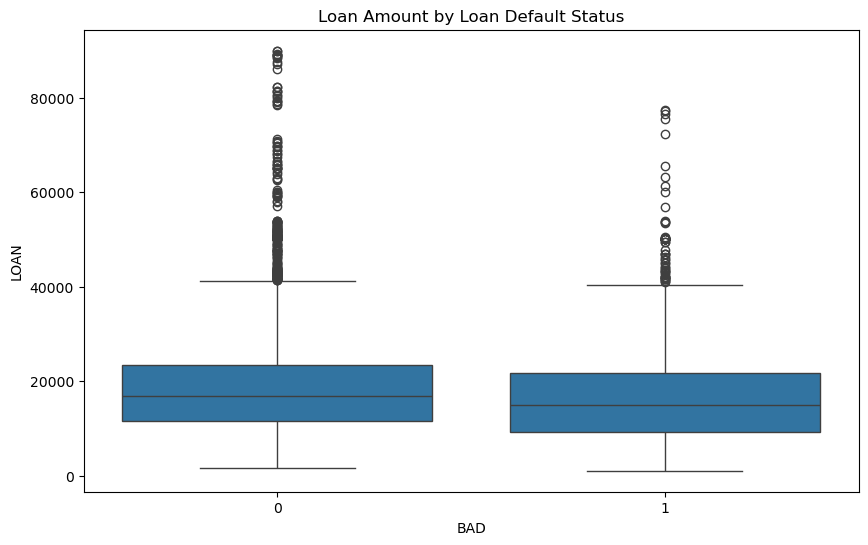

In [55]:
# Loan amount distribution by default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='LOAN', data=df)
plt.title("Loan Amount by Loan Default Status")
plt.show()

# Repeat similar plots for other features such as MORTDUE, VALUE, CLAGE, and DEBTINC


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df.drop(columns=['BAD'])
y = df['BAD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'HomeImp'

In [59]:
# One-Hot Encode 'REASON' and 'JOB' columns
data_encoded = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=True)

# Verify the encoding result
data_encoded.head()


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,True,False,True,False,False,False
1,1,1300.0,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,True,False,True,False,False,False
2,1,1500.0,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,True,False,True,False,False,False
3,1,1500.0,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,False,False,True,False,False,False
4,0,1700.0,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,True,True,False,False,False,False


In [61]:
# Define features and target using the encoded data
X = data_encoded.drop(columns=['BAD'])
y = data_encoded['BAD']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       927
           1       0.87      0.66      0.75       265

    accuracy                           0.90      1192
   macro avg       0.89      0.81      0.84      1192
weighted avg       0.90      0.90      0.90      1192

[[901  26]
 [ 91 174]]
